I started by doing some exploratory analsis on the IMDB dataset

In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("movies_genres.csv", delimiter='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117352 entries, 0 to 117351
Data columns (total 30 columns):
title          117352 non-null object
plot           117352 non-null object
Action         117352 non-null int64
Adult          117352 non-null int64
Adventure      117352 non-null int64
Animation      117352 non-null int64
Biography      117352 non-null int64
Comedy         117352 non-null int64
Crime          117352 non-null int64
Documentary    117352 non-null int64
Drama          117352 non-null int64
Family         117352 non-null int64
Fantasy        117352 non-null int64
Game-Show      117352 non-null int64
History        117352 non-null int64
Horror         117352 non-null int64
Lifestyle      117352 non-null int64
Music          117352 non-null int64
Musical        117352 non-null int64
Mystery        117352 non-null int64
News           117352 non-null int64
Reality-TV     117352 non-null int64
Romance        117352 non-null int64
Sci-Fi         117352 non-null int64

We have a total of 117 352 movies and each of them is associated with 28 possible genres. The genres columns simply contain a 1 or 0 depending of wether the movie is classified into that particular genre or not, so the one-hot-enconding schema is alreay provided in this file.

Next we are going to calculate the absolute number of movies per genre. Note: each movie can be associated with more than one genre, we just want to know which genres have more movies.

In [10]:
df_genres = df.drop(['plot', 'title'], axis=1)
counts = []
categories = list(df_genres.columns.values)
for i in categories:
    counts.append((i, df_genres[i].sum()))
df_stats = pd.DataFrame(counts, columns=['genre', '#movies'])
df_stats

,genre,#movies
0,Action,12381
1,Adult,61
2,Adventure,10245
3,Animation,11375
4,Biography,1385
5,Comedy,33875
6,Crime,15133
7,Documentary,12020
8,Drama,46017
9,Family,15442


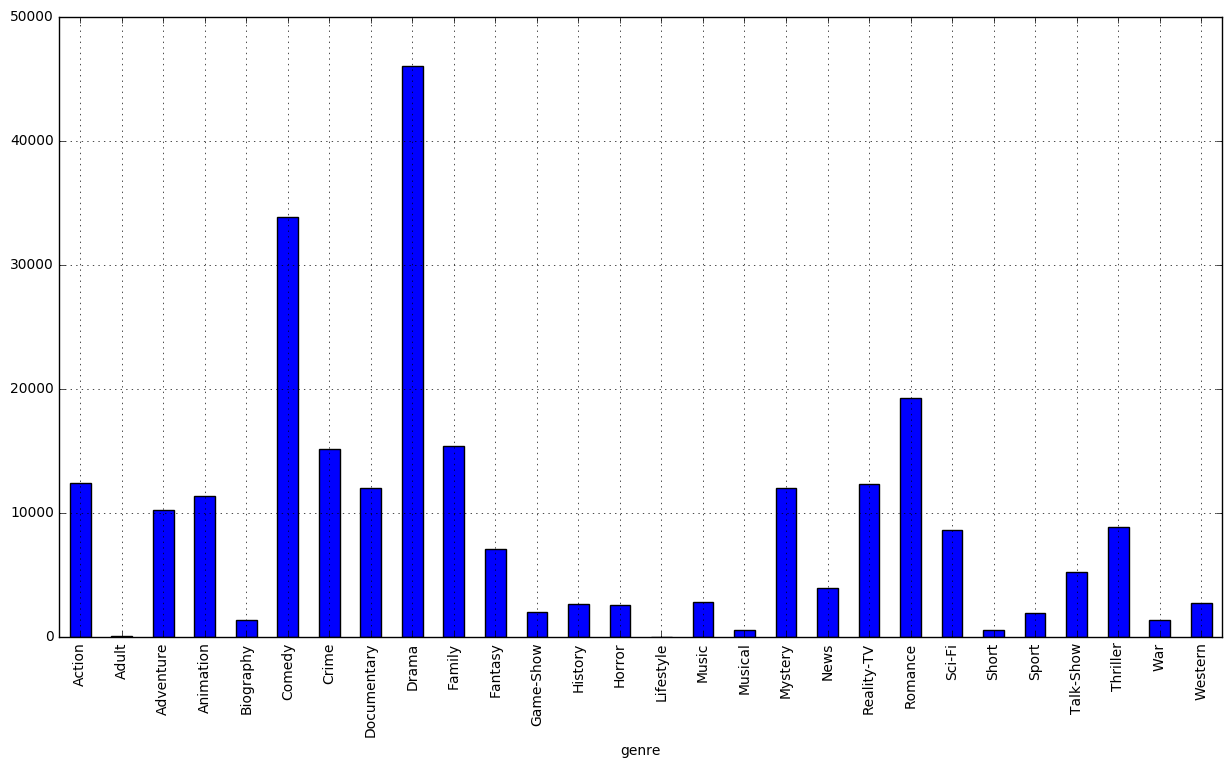

In [13]:
df_stats.plot(x='genre', y='#movies', kind='bar', legend=False, grid=True, figsize=(15, 8))

Since the `Lifestyle` has 0 instances we can just remove it from the data set

In [ ]:
df.drop('Lifestyle', axis=1, inplace=True)

One thing that notice when working with this dataset is that there are plots written in different languages. Let's use [langedetect](https://pypi.python.org/pypi/langdetect?) tool to identify the language in which the plots are written

In [15]:
from langdetect import detect
df['plot_lang'] = df.apply(lambda row: detect(row['plot'].decode("utf8")), axis=1)
df['plot_lang'].value_counts()

en    117196
nl       120
de        14
da         6
it         6
pt         2
fr         2
no         2
hu         1
es         1
sl         1
sv         1
Name: plot_lang, dtype: int64

There other languages besides English, let's just keep English plots, and save this to a new file.

In [ ]:
df = df[df.plot_lang.isin(['en'])]
df.to_csv("movies_genres_en.csv", sep='\t', encoding='utf-8')